#TRATAMENTO DE DADOS

## IMPORTAÇÕES

In [109]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
#biblioteca para remover link
import re
from sklearn.utils import resample
#biblioteca para nuvem de palavras
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
#importando e salvando o dataset
dataset = pd.read_csv("data.csv")

In [111]:
#pegando as noticias e salvando em uma nova variavel
noticia = dataset.Sentence

In [112]:
#pegando os sentimentos e salvando em uma nova variavel
sentimento = dataset.Sentiment

In [113]:
#remoção de noticias paralelamente com o sentimento atrelado
boole = noticia.duplicated()

noticia_nao_repetida = []
sentimento_nao_repetido = []

for i in range(len(noticia)):
  if not boole[i]:
    noticia_nao_repetida.append(noticia[i])
    sentimento_nao_repetido.append(sentimento[i])

In [114]:
def remove_links(sentence):
    # Padrão de expressão regular para identificar links
    link_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Substitui os links por uma string vazia
    sentence_without_links = re.sub(link_pattern, '', sentence)

    return sentence_without_links

# Exemplo de uso
noticia_sem_links = [remove_links(sentenca) for sentenca in noticia_nao_repetida]

In [115]:
#Análise de N-Gram

Stopwords = list(set(nltk.corpus.stopwords.words("english")) - set(["not"]))

df2 = pd.DataFrame({'Sentence':noticia_sem_links, 'Sentiment':sentimento_nao_repetido})

def Gram_Analysis(Corpus, Gram, N):

  # Vetorizador
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # Matrix de N-Gran
  ngrams = Vectorizer.fit_transform(Corpus)

  # Frequencia de N-Gran
  Count = ngrams.sum(axis=0)

  # Lista de Palavras
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Ordenar descendente com chave = contagem
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

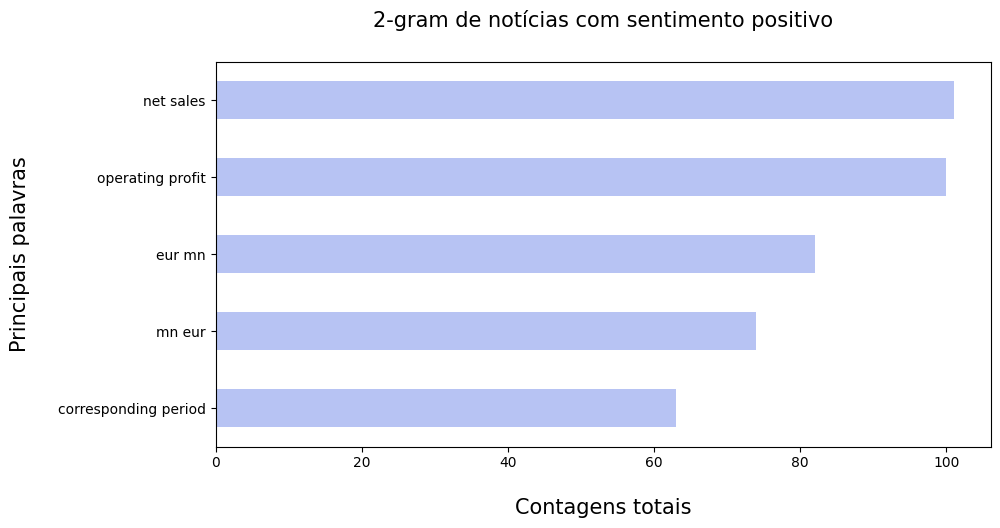

In [116]:
#Unigrams
# Encontrando 2-gram
df_positive = df2[df2["Sentiment"] == "positive"].dropna()
words_p = Gram_Analysis(df_positive["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_p, columns = ["Words", "Counts"])

# Visualização
color_p=['#B7C3F3']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_p, figsize = (10, 5))
plt.title("2-gram de notícias com sentimento positivo", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagens totais", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/p_2gram.png', dpi=300)
plt.show()

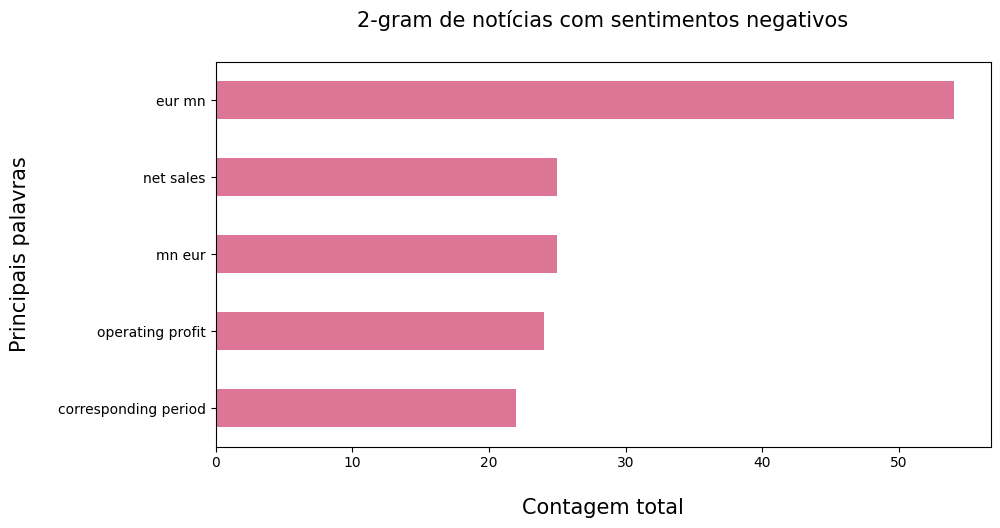

In [117]:
# Encontrando 2-gram
df_negative = df2[df2["Sentiment"] == "negative"].dropna()
words_n = Gram_Analysis(df_negative["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_n, columns = ["Words", "Counts"])

# Visualização
color_n = ['#DD7596']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_n, figsize = (10, 5))
plt.title("2-gram de notícias com sentimentos negativos", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagem total", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/n_2gram.png', dpi=300)
plt.show()

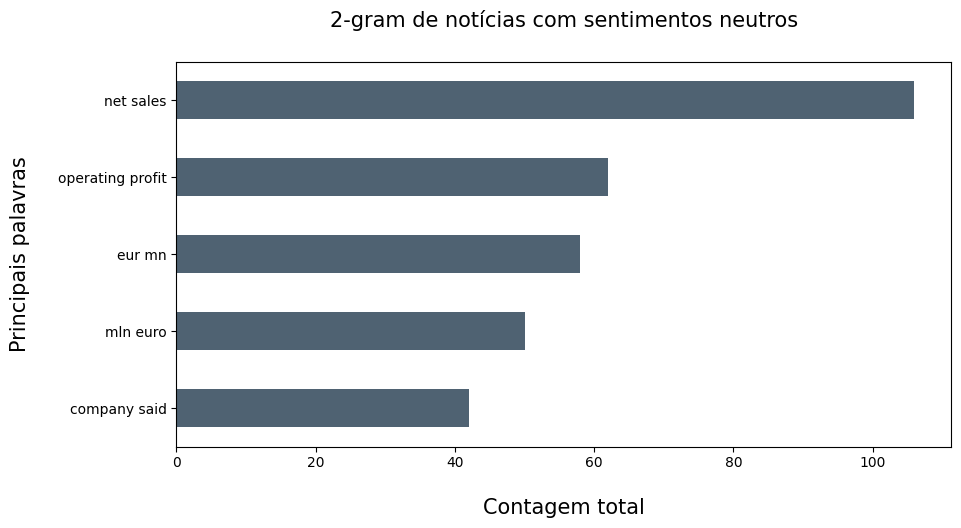

In [118]:
# Encontrando 2-gram
df_neutral = df2[df2["Sentiment"] == "neutral"].dropna()
words_nl = Gram_Analysis(df_neutral["Sentence"], 2, 5)
Bigram = pd.DataFrame(words_nl, columns = ["Words", "Counts"])

# Visualização
color_nl = ['#4F6272']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_nl, figsize = (10, 5))
plt.title("2-gram de notícias com sentimentos neutros", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Contagem total", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Principais palavras", fontsize = 15, labelpad = 20)
plt.savefig('imagens/nl_2gram.png', dpi=300)
plt.show()

In [119]:
#tokenização
noticia_tokens = [nltk.word_tokenize(noticia) for noticia in noticia_sem_links]

In [120]:
#normalização das noticia
#declarando a lista noticia_normalizado com seu tamanho para depois povoar com
#as palavras normalizadas
noticia_normalizado = [None]*len(noticia_tokens)
for i in range (len(noticia_tokens)):
  noticia_normalizado[i] = [word.lower() for word in noticia_tokens[i] if word.isalnum()]

In [122]:
#normalização dos sentimentos
sentimento_normalizado = [word.lower() for word in sentimento_nao_repetido if word.isalpha]

In [123]:
#remover as stop words
noticia_filtrado = [None]*len(noticia_normalizado)
stop_words = set(stopwords.words('english'))
for i in range (len(noticia_normalizado)):
  noticia_filtrado[i] = [token.lower() for token in noticia_normalizado[i] if not token in stop_words]

In [124]:
#lematização das noticias
lematizador = WordNetLemmatizer()
noticia_lematizado = [None]*len(noticia_filtrado)
for i in range (len(noticia_tokens)):
  noticia_lematizado[i] = [lematizador.lemmatize(token) for token in noticia_filtrado[i]]

In [125]:
novo_dataset = pd.DataFrame({'Sentence':noticia_lematizado, 'Sentiment':sentimento_normalizado})

In [126]:
#UNDERSAMPLING QUE DEU CERTOOOOOO
# Calcular a contagem de cada classe
counts = novo_dataset['Sentiment'].value_counts()

# Encontrar o sentimento com o menor número de instâncias
sentimento_minimo = counts.idxmin()

# Inicializar um DataFrame vazio para armazenar os subconjuntos balanceados
dfs_balanceados = []

# Iterar sobre cada classe
for sentimento in counts.index:
    # Dividir o DataFrame em subconjuntos por classe
    df_classe = novo_dataset[novo_dataset['Sentiment'] == sentimento]

    # Se não for a classe com o menor número de instâncias, realizar undersampling
    if sentimento != sentimento_minimo:
        df_classe_downsampled = resample(df_classe, replace=False, n_samples=counts[sentimento_minimo], random_state=42)
        dfs_balanceados.append(df_classe_downsampled)
    else:
        # Se for a classe com o menor número de instâncias, adicionar diretamente ao DataFrame balanceado
        dfs_balanceados.append(df_classe)

# Combinar os subconjuntos balanceados
df_balanceado = pd.concat(dfs_balanceados)

# Exibir o DataFrame balanceado
print(df_balanceado)

                                               Sentence Sentiment
866   [customer, include, company, energy, process, ...   neutral
2643     [investment, worth, approximately, eur, 100mn]   neutral
4371  [honkarakenne, also, decided, yesterday, sell,...   neutral
2920  [company, said, offshore, segment, represented...   neutral
2016  [vaisala, present, weather, detector, measure,...   neutral
...                                                 ...       ...
5296                    [fb, hitting, everything, twtr]  negative
5298                                  [bobe, premarket]  negative
5303                                   [acad, 2, today]  negative
5313         [sbux, pm, db, downgrade, pt, cut, 70, 64]  negative
5317  [hsbc, say, unit, book, 585, million, charge, ...  negative

[1776 rows x 2 columns]


In [127]:
df_balanceado['Sentiment'].value_counts()

neutral     592
positive    592
negative    592
Name: Sentiment, dtype: int64

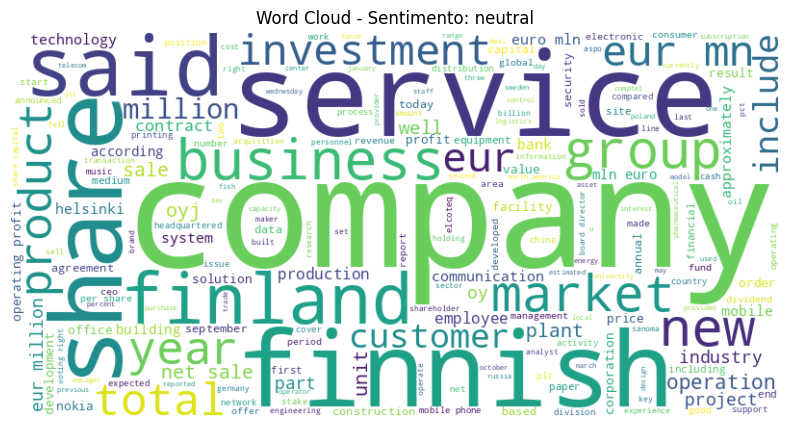

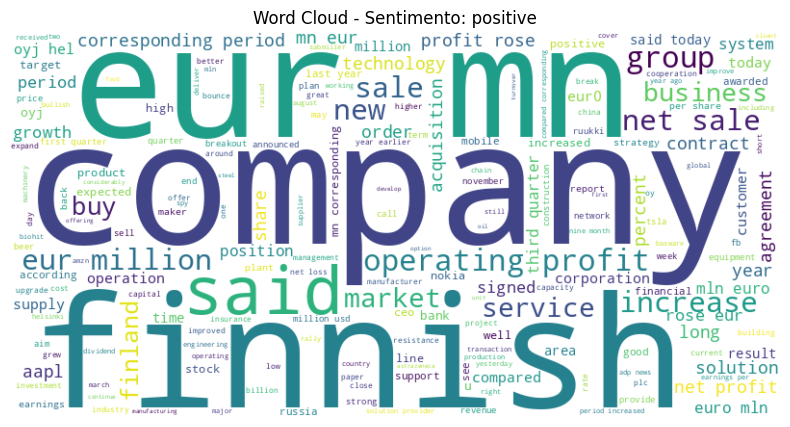

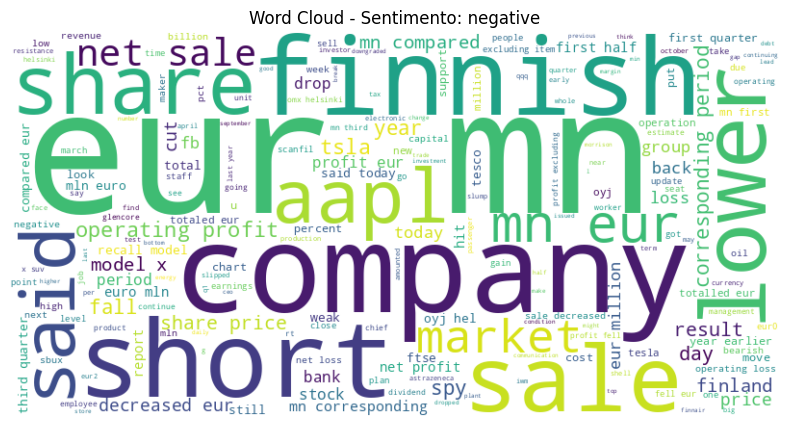

In [128]:
#nuvem de palavra
# Juntar todas as palavras tokenizadas em uma única string para cada sentimento
texto_sentimento = {}
for sentimento in df_balanceado['Sentiment'].unique():
    tokenized_news = df_balanceado[df_balanceado['Sentiment'] == sentimento]['Sentence'].values
    texto_sentimento[sentimento] = ' '.join([' '.join(tokens) for tokens in tokenized_news])

# Criar e exibir a nuvem de palavras para cada sentimento
for sentimento, texto in texto_sentimento.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Sentimento: {sentimento}')
    plt.axis('off')
    plt.savefig(f'imagens/{sentimento}wordcloud.png', dpi=300)
    plt.show()